<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-файлы-и-изучим-их." data-toc-modified-id="Откроем-файлы-и-изучим-их.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файлы и изучим их.</a></span></li><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно.-Вычислим-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдем-MAE-между-нашими-расчётами-и-значением-признака." data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно.-Вычислим-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдем-MAE-между-нашими-расчётами-и-значением-признака.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Проведем-предобработку-данных." data-toc-modified-id="Проведем-предобработку-данных.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведем предобработку данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравним-распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравним-распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределение размеров гранул сырья на обучающей и тестовой выборках.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишим-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишим-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишим функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучим-модели-и-оценим-их-качество-кросс-валидацией." data-toc-modified-id="Обучим-модели-и-оценим-их-качество-кросс-валидацией.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим модели и оценим их качество кросс-валидацией.</a></span></li>
   

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Подготовка данных

In [2]:
! pip install missingno
 
import missingno as msno

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor

###  Откроем файлы и изучим их.

In [4]:
data = pd.read_csv('/gold_recovery_full_new.csv')
train = pd.read_csv('/gold_recovery_train_new.csv')
test = pd.read_csv('/gold_recovery_test_new.csv')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [ ]:
data.describe()

In [ ]:
data.head()

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
train.describe()

In [ ]:
train.head()

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
test.describe()

In [ ]:
test.head()

Теставая и тренировочная выборки обладают разным числом признаков. В выборках имеются пустые строки. Колонка date содержит строки с типом данных object.

### Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.

In [ ]:
rougher_output_recovery = train['rougher.output.concentrate_au']*(
    train['rougher.input.feed_au']-train['rougher.output.tail_au'])/train['rougher.input.feed_au']/(
    train['rougher.output.concentrate_au']-train['rougher.output.tail_au'])* 100
rougher_output_recovery

In [ ]:
 train['rougher.output.recovery']

In [16]:
mean_absolute_error(train['rougher.output.recovery'], rougher_output_recovery)

1.0748911125799084e-14

Вроде бы все хорошо

### Проанализируем признаки, недоступные в тестовой выборке.

In [ ]:
unique_train_columns = []
for i in range(len(train.columns)):
    if train.columns[i] not in test.columns:
        unique_train_columns.append(train.columns[i])
        print(train.columns[i])
        
print()        
print('Число уникальных признаков в тренировочной выборке: ', len(unique_train_columns))

Как мы видим из тестовой выборки убраны все признаки выхода, а так же целевые признаки. Наши модели должны по характеристикам сырья, показателям добавок предсказывать выход (коэффициент обогащения после этапа флотации и финальной очистки), отсутствующие столбцы несут как раз информацию которая послужит утечкой данных, если их включить в признаки. 

###  Проведем предобработку данных.

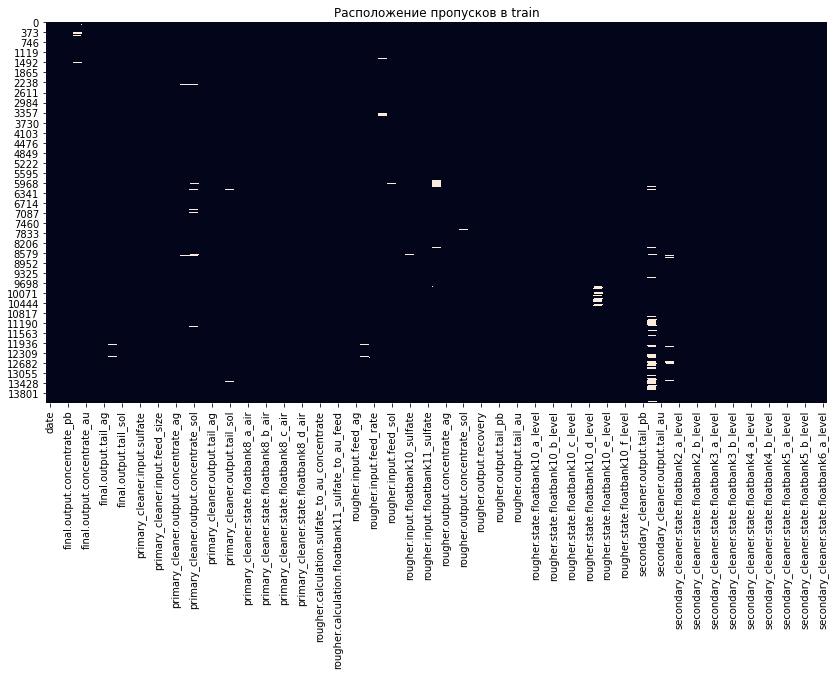

In [18]:
plt.subplots(figsize=(14, 7))
sns.heatmap(train.isnull(), cbar = False)
plt.title('Расположение пропусков в train')
plt.show()

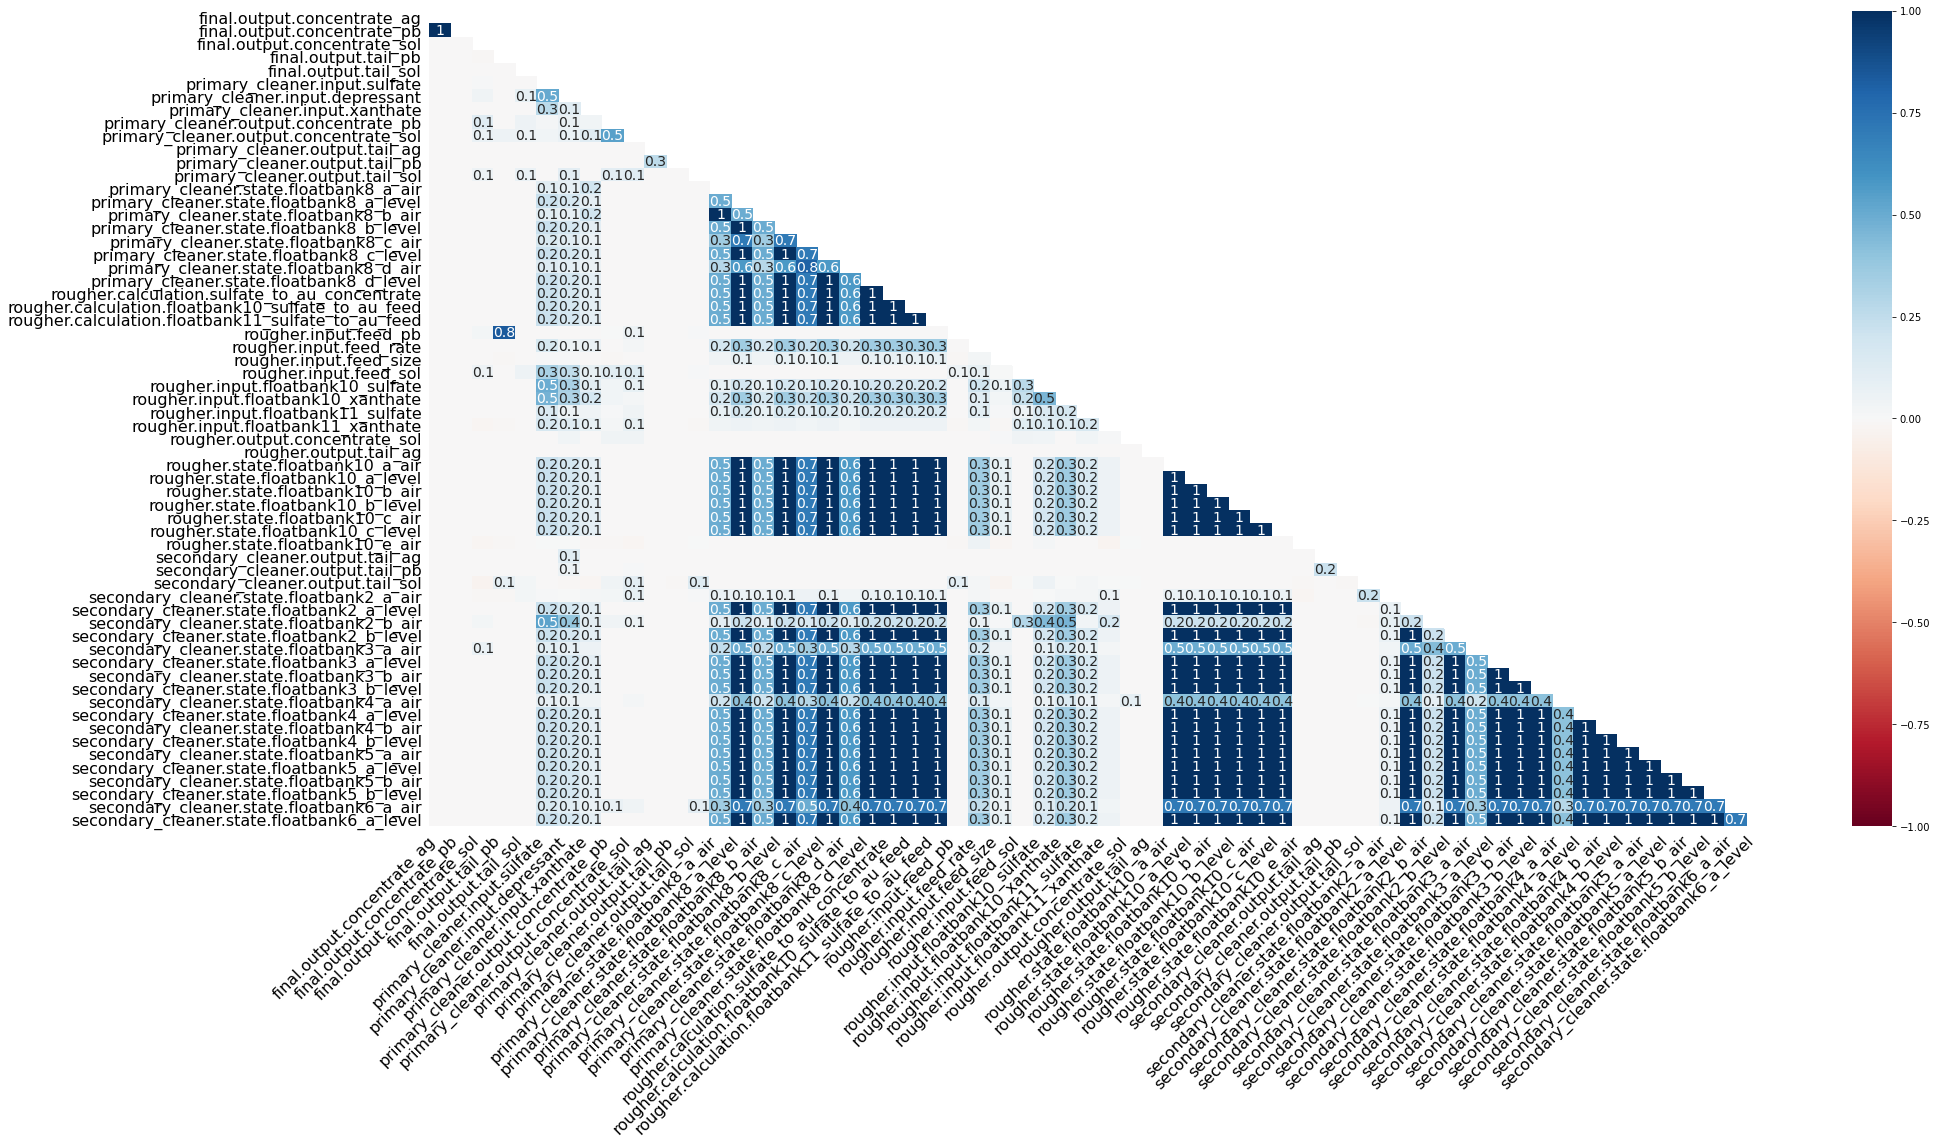

In [19]:
msno.heatmap(train, figsize = (30, 15))
plt.show()

DataFrame содержит пропущенные значения, их немного, но от пропусков стоит избавится путем постановки на их места значения соседних строк

In [20]:
train.date = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')

приведем признак date к типу данных  datetime

In [21]:
train = train.interpolate(method = 'pad')

In [22]:
print(f'{train.date.duplicated().sum()=}')

train.date.duplicated().sum()=0


Явные дубликаты не обнаружены

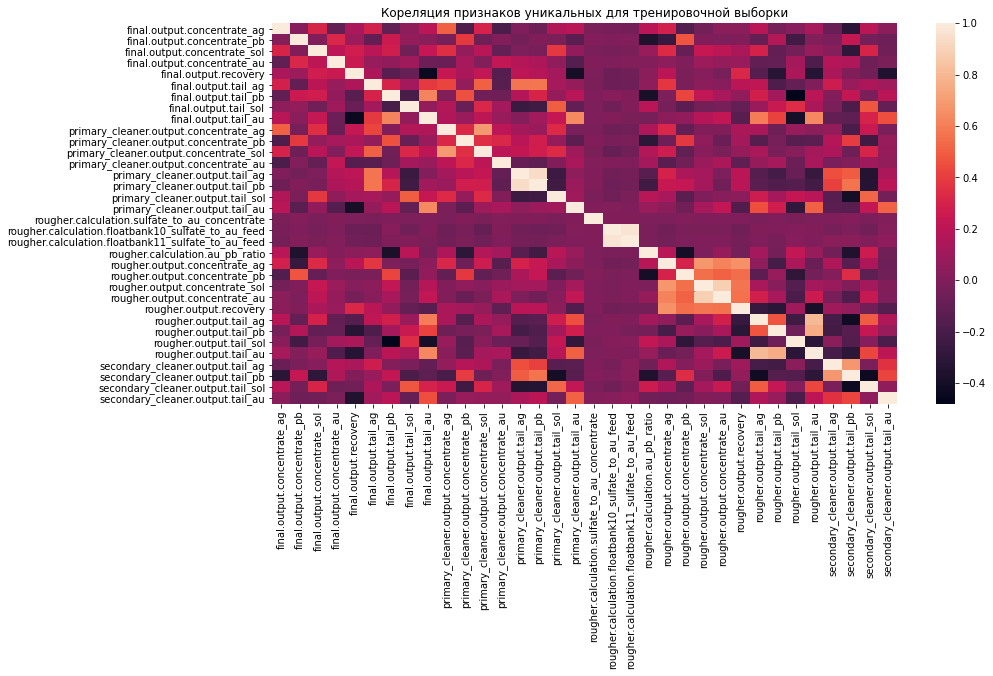

In [23]:
plt.subplots(figsize=(14, 7))
sns.heatmap(train[unique_train_columns].corr())
plt.title('Кореляция признаков уникальных для тренировочной выборки')
plt.show()

Эффективность обогащения на стадии флотации сильно корррелируют с концентрациями веществ в черновом концентрате, так же эти концентрации коррелируют между собой. При этом такая корреляция для финального концентрата не наблюдается.

Осуществим замену пропущенных значений для остальных dataframe похожим способом

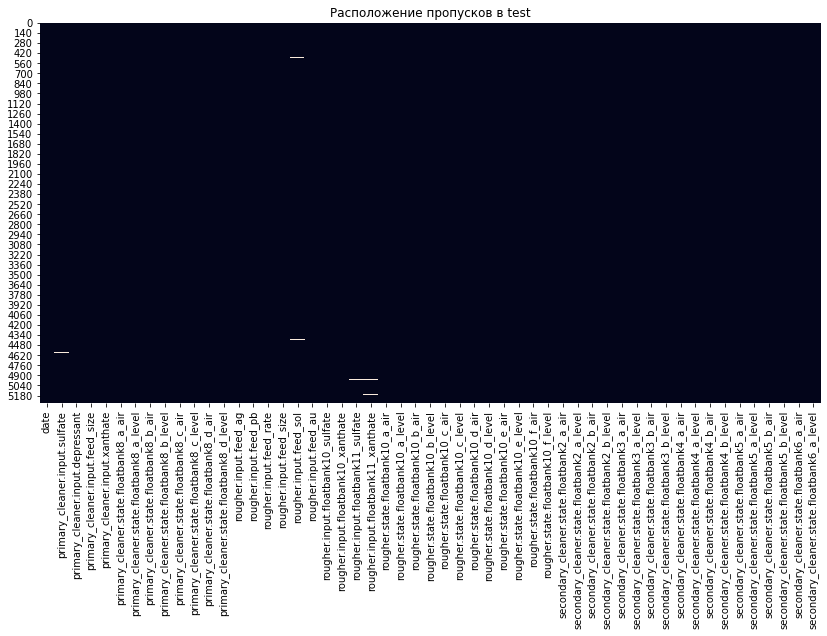

In [24]:
plt.subplots(figsize=(14, 7))
sns.heatmap(test.isnull(), cbar = False)
plt.title('Расположение пропусков в test')
plt.show()

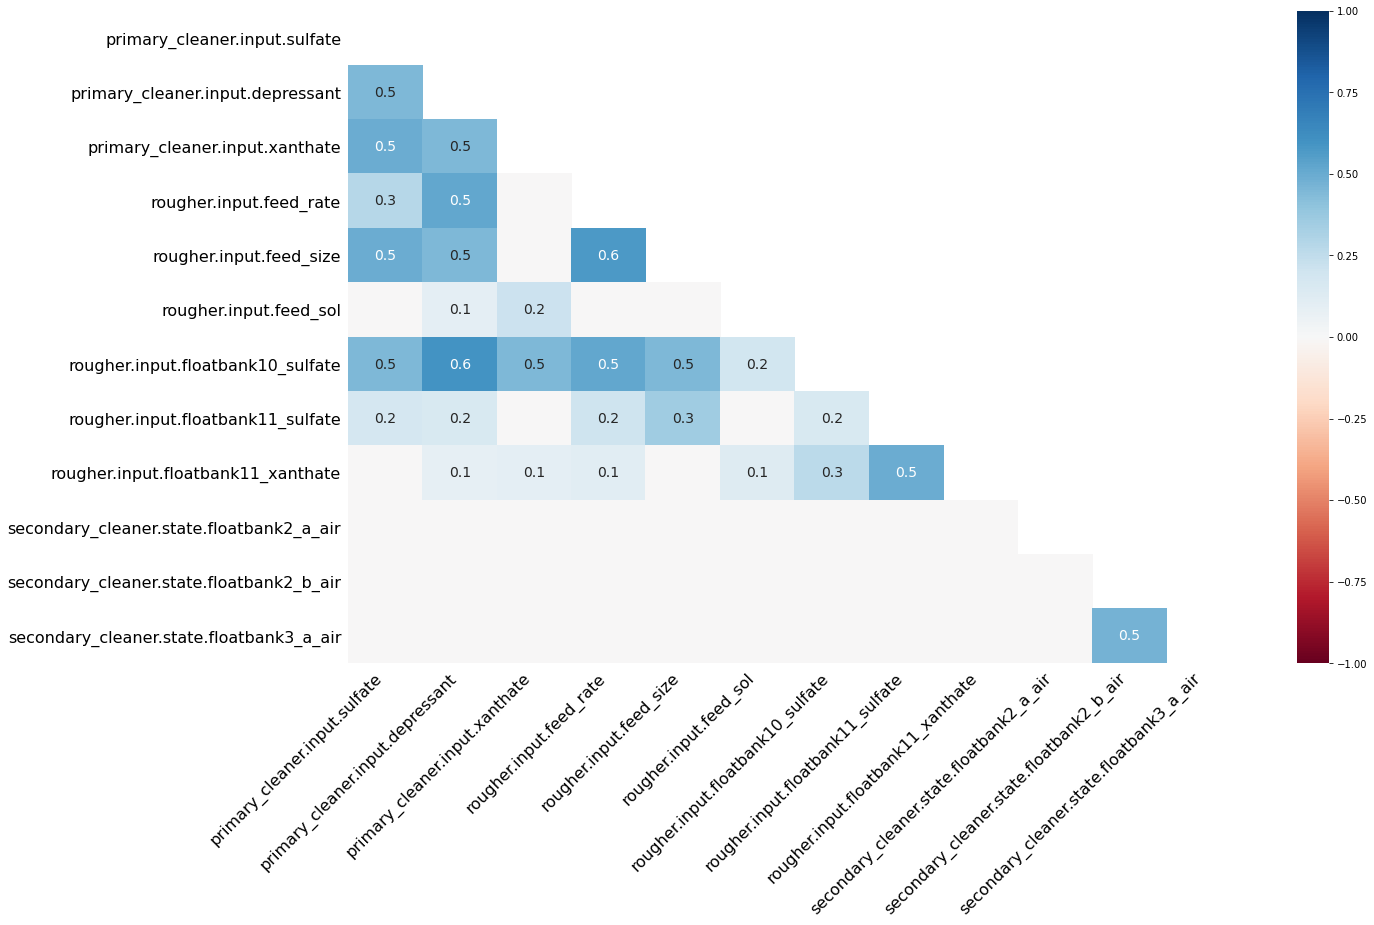

In [25]:
msno.heatmap(test)
plt.show()

In [26]:
test.date = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
tеst= test.interpolate(method = 'pad')
print(f'{test.date.duplicated().sum()=}')

test.date.duplicated().sum()=0


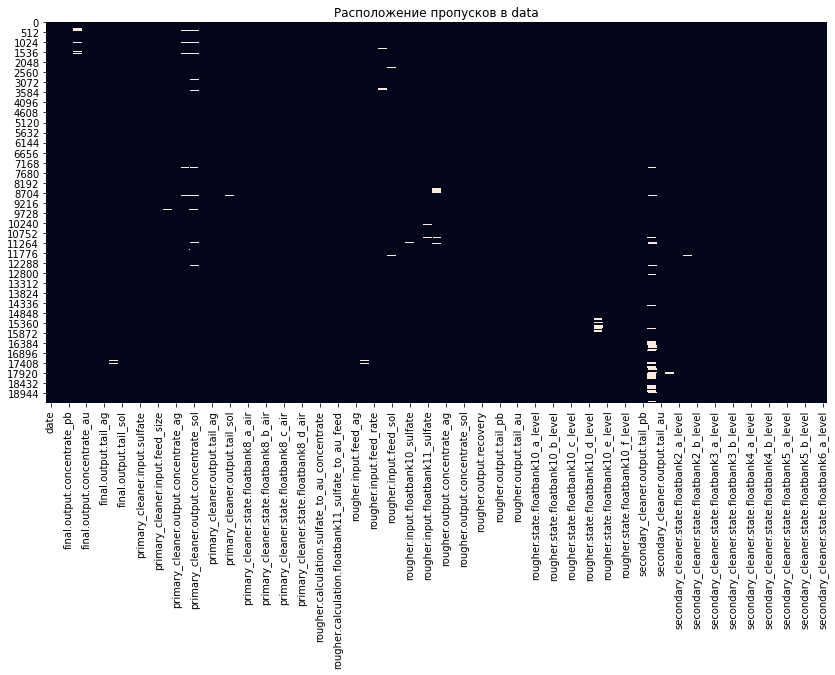

In [27]:
plt.subplots(figsize=(14, 7))
sns.heatmap(data.isnull(), cbar = False)
plt.title('Расположение пропусков в data')
plt.show()

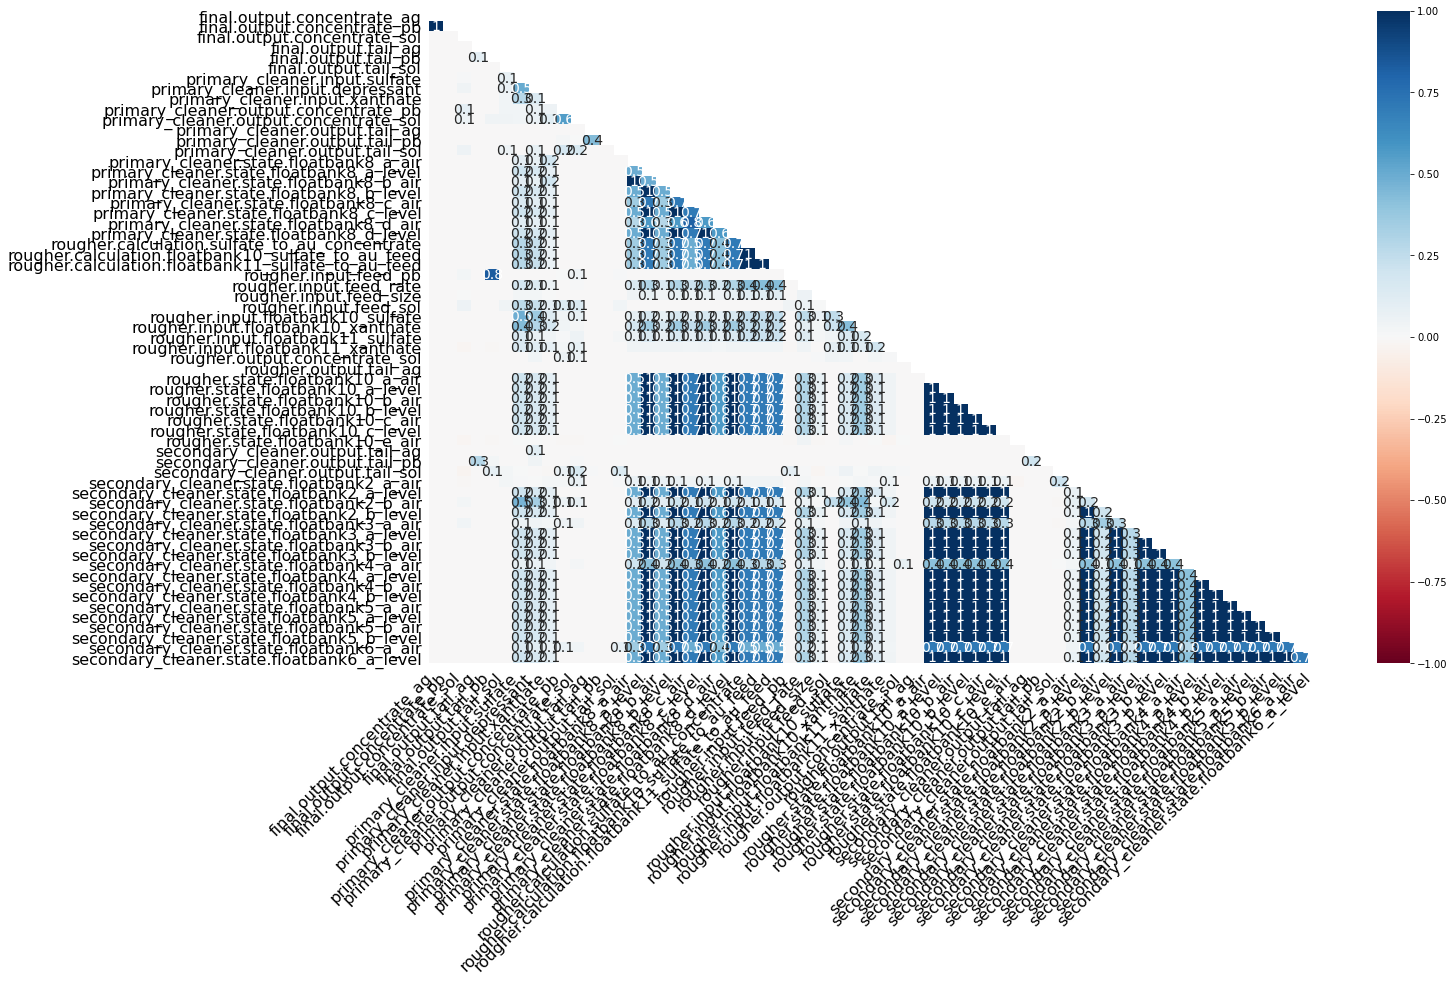

In [28]:
msno.heatmap(data)
plt.show()

In [29]:
data.date = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data= data.interpolate(method = 'pad')
print(f'{data.date.duplicated().sum()=}')

data.date.duplicated().sum()=0


Пустые строки заполнены, дублекаты отсутствуют - предаработка выполнена.

## Анализ данных

###  Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [30]:
concentrate_au = pd.DataFrame(
    {'process':[
        'input', 'rougher', 'primary_cleaner', 'secondary_cleaner'], 'concentrate_au':[
        data['rougher.input.feed_au'].mean(), data['rougher.output.concentrate_au'].mean(), data['primary_cleaner.output.concentrate_au'].mean(), data['final.output.concentrate_au'].mean()]})
concentrate_au

,process,concentrate_au
0,input,8.266097
1,rougher,19.772000
2,primary_cleaner,32.119400
3,secondary_cleaner,44.076513


In [31]:
concentrate_ag = pd.DataFrame(
    {'process':[
        'input', 'rougher', 'primary_cleaner', 'secondary_cleaner'], 'concentrate_ag':[
        data['rougher.input.feed_ag'].mean(), data['rougher.output.concentrate_ag'].mean(), data['primary_cleaner.output.concentrate_ag'].mean(), data['final.output.concentrate_ag'].mean()]})
concentrate_ag

,process,concentrate_ag
0,input,8.794927
1,rougher,11.994759
2,primary_cleaner,8.442408
3,secondary_cleaner,5.168387


In [32]:
concentrate_pb = pd.DataFrame(
    {'process':[
        'input', 'rougher', 'primary_cleaner', 'secondary_cleaner'], 'concentrate_pb':[
        data['rougher.input.feed_pb'].mean(), data['rougher.output.concentrate_pb'].mean(), data['primary_cleaner.output.concentrate_pb'].mean(), data['final.output.concentrate_pb'].mean()]})
concentrate_pb

,process,concentrate_pb
0,input,3.585096
1,rougher,7.606272
2,primary_cleaner,9.810317
3,secondary_cleaner,9.978821


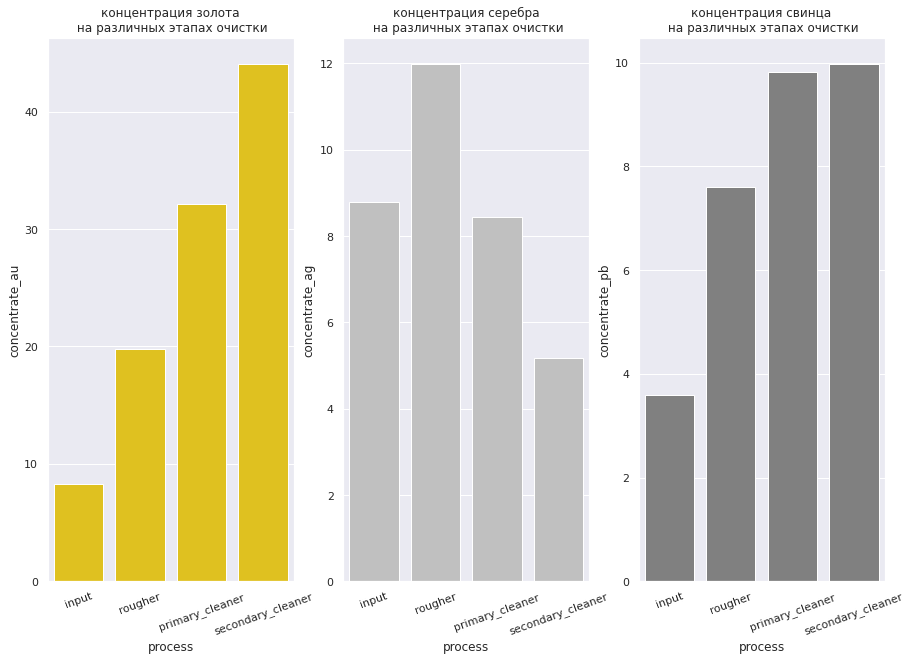

In [33]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(1, 3, 1)
sns.barplot(y = 'concentrate_au', x='process',  data=concentrate_au, color='gold')
plt.xticks(rotation = 20)
plt.title('концентрация золота\n на различных этапах очистки')
plt.subplot(1, 3, 2)
sns.barplot(y = 'concentrate_ag', x='process',  data=concentrate_ag, color='silver')
plt.xticks(rotation = 20)
plt.title('концентрация серебра\n на различных этапах очистки')
plt.subplot(1, 3, 3)
sns.barplot(y = 'concentrate_pb', x='process',  data=concentrate_pb, color='grey')
plt.xticks(rotation = 20)
plt.title('концентрация свинца\n на различных этапах очистки')
plt.show()

Концентрация всех веществ растет после флотации. Далее концентрация золота и свинца растет в ходе процесса очистки, а серебра падает.

###   Сравним распределение размеров гранул сырья на обучающей и тестовой выборках. 

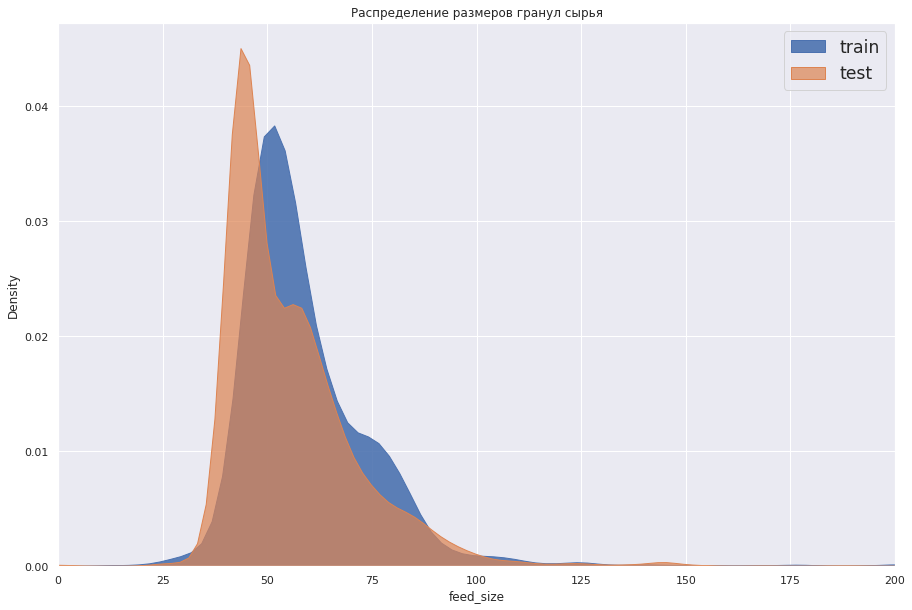

In [34]:
sns.kdeplot(train['rougher.input.feed_size'], label = 'train', alpha = .9, shade = True)
sns.kdeplot(test['rougher.input.feed_size'], label = 'test', alpha = .7, shade = True)
plt.xlim([0,200])
plt.xlabel('feed_size')
plt.legend(loc = 'upper right', fontsize = 'x-large')
plt.title('Распределение размеров гранул сырья')
plt.show()

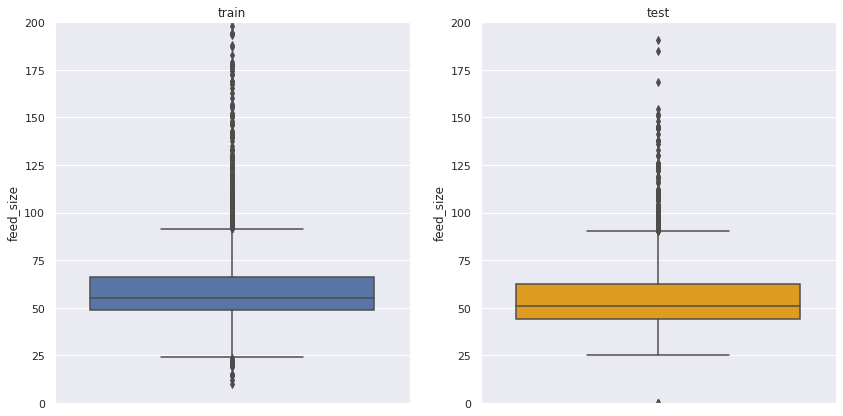

In [35]:
sns.set(rc={'figure.figsize':(14,7)})

plt.subplot(1, 2, 1)
sns.boxplot(data=train, y='rougher.input.feed_size')
plt.ylabel('feed_size')
plt.ylim([0,200])
plt.title("train")
plt.subplot(1, 2, 2)
sns.boxplot(data=test, y='rougher.input.feed_size', color='orange')
plt.ylabel('feed_size')
plt.ylim([0,200])
plt.title("test")
plt.show()

Распределения разнятся, но не критично

2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [36]:
substance_sum = pd.DataFrame()
substance_sum['date'] = data['date']
substance_sum['feed'] = data[[
    'rougher.input.feed_pb','rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_sol']].sum(axis=1)
substance_sum['primary_concentrate'] = data[[
    'rougher.output.concentrate_pb','rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_sol']].sum(axis=1)
substance_sum['final_concentrate'] = data[[
    'final.output.concentrate_pb','final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_sol']].sum(axis=1)

substance_sum.head()

,date,feed,primary_concentrate,final_concentrate
0,2016-01-15 00:00:00,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,47.859163,65.908382,64.004667


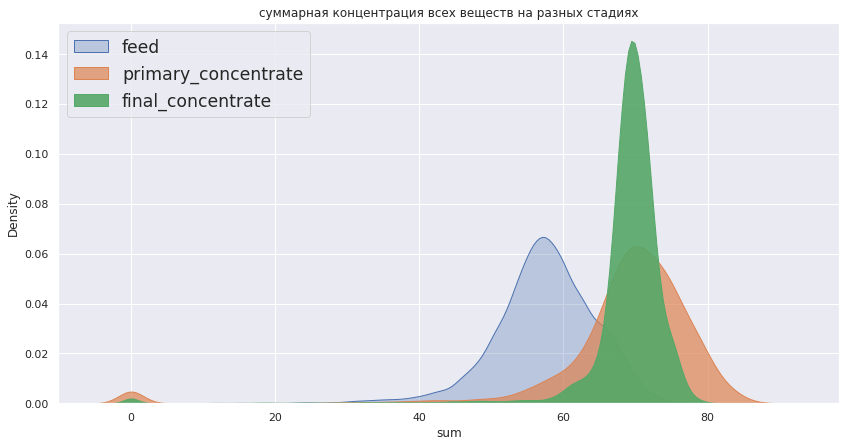

In [37]:
sns.kdeplot(substance_sum['feed'], label = 'feed', alpha = .3, shade = True)
sns.kdeplot(substance_sum['primary_concentrate'], label = 'primary_concentrate', alpha = .7, shade = True)
sns.kdeplot(substance_sum['final_concentrate'], label = 'final_concentrate', alpha = .9, shade = True)
plt.xlabel('sum')
plt.legend(loc = 'upper left', fontsize = 'x-large')
plt.title('суммарная концентрация всех веществ на разных стадиях')
plt.show()

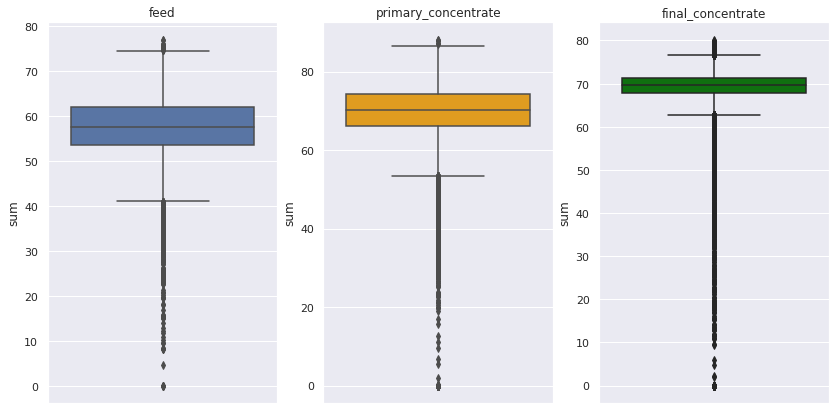

In [38]:
sns.set(rc={'figure.figsize':(14,7)})

plt.subplot(1, 3, 1)
sns.boxplot(data=substance_sum, y='feed')
plt.ylabel('sum')
plt.title("feed")
plt.subplot(1, 3, 2)
sns.boxplot(data=substance_sum, y='primary_concentrate', color='orange')
plt.ylabel('sum')
plt.title("primary_concentrate")
plt.subplot(1, 3, 3)
sns.boxplot(data=substance_sum, y='final_concentrate', color='green')
plt.ylabel('sum')
plt.title("final_concentrate")
plt.show()

Несмотря на снижение концентрации серебра в сырье в ходе отчистки, сумарной концентрации веществ отчистка только на пользу - она растет. При этом присутствуют нулевые значения, необходимо их удалить как нехарактерные

In [39]:
for_drop = substance_sum.query('feed == 0 or primary_concentrate == 0 or final_concentrate == 0')
data = data.query(
   'date not in @for_drop["date"]')
test = data.query(
   'date not in @for_drop["date"]')
train = data.query(
   'date not in @for_drop["date"]')

## Модель

###  Напишим функцию для вычисления итоговой sMAPE.

In [40]:
def sMAPE(target, predicted):
    return 100/len(target)* np.sum(2*np.abs(target-predicted)/(np.abs(target)+np.abs(predicted)))

In [41]:
def sMAPE_result(sMAPE_rougher, sMAPE_final):
    return (sMAPE_rougher + 3*sMAPE_final)/4

Первая функция расчитывает sMAPE для модели, вторая принимает финальное sMAPE и флотации затем возвращает итоговую sMAPE

###  Обучим модели и оценим их качество кросс-валидацией.  

Выделим целевые признаки для флотации и финальной отчистки, а также удалим признаки отсутствующие в тестовой выборке и признак date, который не окажет влияние на эффективность отчистки

In [42]:
target_train_rougher = train['rougher.output.recovery']
target_train_final = train['final.output.recovery']

features_train_final = train.drop(['date', *unique_train_columns], axis = 1)

Часть признаков не будет доступна на момент флотации, удалим их для расчета эффективности процесса флотации

In [43]:
no_rougher_columns = [column for column in list(features_train_final.columns) if 'cleaner' in column]
features_train_rougher = features_train_final.drop(no_rougher_columns, axis = 1)

Востановим целевые признаки тестовой выборки из date, features так же создадим из date (вдруг в test ее попортили, ну и мне так легче)

In [44]:
target_test_rougher = data.query(
   'date in @test["date"]')['rougher.output.recovery']
target_test_final = data.query(
   'date in @test["date"]')['final.output.recovery']
features_test_final = data.query(
   'date in @test["date"]').drop(['date', *unique_train_columns], axis = 1)
features_test_rougher = features_test_final.drop(no_rougher_columns, axis = 1)

Стандартизируем данные в выборках

In [45]:
scaler = StandardScaler()
scaler.fit(features_train_rougher[list(features_train_rougher.columns)]) 
features_train_rougher[list(features_train_rougher.columns)] = scaler.transform(features_train_rougher[list(features_train_rougher.columns)]) 
features_test_rougher[list(features_train_rougher.columns)] = scaler.transform(features_test_rougher[list(features_train_rougher.columns)])

In [46]:
scaler.fit(features_train_final[list(features_train_final.columns)]) 
features_train_final[list(features_train_final.columns)] = scaler.transform(features_train_final[list(features_train_final.columns)]) 
features_test_final[list(features_train_final.columns)] = scaler.transform(features_test_final[list(features_train_final.columns)])

In [47]:
scorer = make_scorer(sMAPE, greater_is_better = False)

In [48]:
%%time

clf = RandomForestRegressor()
parametrs = {'n_estimators': range(10, 51, 10),
            'max_depth': range(1,11,1)}
grid = GridSearchCV(clf, parametrs, scoring=scorer, n_jobs=-1,cv =5, verbose = 2)
grid.fit(features_train_final, target_train_final)
grid.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.6s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.6s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.6s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.6s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.6s
[CV] END .......................max_depth=1, n_estimators=20; total time=   1.2s
[CV] END .......................max_depth=1, n_estimators=20; total time=   1.2s
[CV] END .......................max_depth=1, n_estimators=20; total time=   1.3s
[CV] END .......................max_depth=1, n_estimators=20; total time=   1.2s
[CV] END .......................max_depth=1, n_estimators=20; total time=   1.3s
[CV] END .......................max_depth=1, n_estimators=30; total time=   2.0s
[CV] END .......................max_depth=1, n_

{'max_depth': 3, 'n_estimators': 40}

In [49]:
grid.best_score_

-8.955976509052718

In [50]:
%%time

grid = GridSearchCV(clf, parametrs, scoring=scorer, n_jobs=-1,cv =5)
grid.fit(features_train_rougher, target_train_rougher)
grid.best_params_

{'max_depth': 5, 'n_estimators': 10}
CPU times: user 14min 12s, sys: 956 ms, total: 14min 13s
Wall time: 14min 14s


-5.7546589802693875

In [51]:
grid.best_score_

-5.7546589802693875

In [52]:
%%time

clf = GradientBoostingRegressor()
grid = GridSearchCV(clf, parametrs, scoring=scorer, n_jobs=-1,cv =5, verbose = 2)
grid.fit(features_train_final, target_train_final)
grid.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.9s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.9s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.9s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.9s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.9s
[CV] END .......................max_depth=1, n_estimators=20; total time=   1.8s
[CV] END .......................max_depth=1, n_estimators=20; total time=   1.9s
[CV] END .......................max_depth=1, n_estimators=20; total time=   1.9s
[CV] END .......................max_depth=1, n_estimators=20; total time=   1.8s
[CV] END .......................max_depth=1, n_estimators=20; total time=   1.9s
[CV] END .......................max_depth=1, n_estimators=30; total time=   3.0s
[CV] END .......................max_depth=1, n_

-8.708844927553658

In [53]:
grid.best_score_

-8.708844927553658

In [54]:
%%time

grid = GridSearchCV(clf, parametrs, scoring=scorer, n_jobs=-1,cv =5)
grid.fit(features_train_rougher, target_train_rougher)
grid.best_params_

{'max_depth': 4, 'n_estimators': 30}
CPU times: user 23min 30s, sys: 1.61 s, total: 23min 32s
Wall time: 23min 34s


-5.642074446628721

In [55]:
grid.best_score_

-5.642074446628721

Проверим формулы sMAPE на линейной регрессии

In [56]:
model = LinearRegression()

scores = cross_val_score(model, features_train_rougher, target_train_rougher, scoring = scorer, cv=5)
rougher_score = sum(scores)/len(scores)
scores = cross_val_score(model, features_train_final, target_train_final, scoring = scorer, cv=5)
final_score = sum(scores)/len(scores)

print('Средняя оценка sMAPE для флотации:', rougher_score)
print('Средняя оценка sMAPE для финальной отчистки:', final_score)
print()
print('Итоговая sMAPE:', sMAPE_result(rougher_score, final_score))

Средняя оценка sMAPE для флотации: -6.461333915182749
Средняя оценка sMAPE для финальной отчистки: -9.656259074756914

Итоговая sMAPE: -8.857527784863372


Проверим лучшие модели на тестовых выборках.

In [61]:
model = GradientBoostingRegressor(max_depth = 4, n_estimators = 30)
model.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model.predict(features_test_rougher)
print('sMAPE rougher = ', sMAPE_roucher := sMAPE(target_test_rougher, predicted_rougher))

model = GradientBoostingRegressor(max_depth = 3, n_estimators = 40)
model.fit(features_train_final, target_train_final)
predicted_final = model.predict(features_test_final)
print('sMAPE final = ', sMAPE_final := sMAPE(target_test_final, predicted_final))
print()
print('Итоговая sMAPE:', sMAPE_result(sMAPE_roucher, sMAPE_final))

sMAPE rougher =  3.8372490470732616
sMAPE final =  7.122190702374632

Итоговая sMAPE: 6.300955288549289


Проверим модель на адекватность

In [60]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train_rougher, target_train_rougher)
dummy_roucher =dummy_regr.predict(features_test_rougher)
print('sMAPE dummy rougher = ', sMAPE_dummy_roucher := sMAPE(target_test_rougher, dummy_roucher))

dummy_regr.fit(features_train_final, target_train_final)
dummy_final =dummy_regr.predict(features_test_final)
print('sMAPE dummy final = ', sMAPE_dummy_final := sMAPE(target_test_final, dummy_final))
print()
print('Итоговая sMAPE для dummy:', sMAPE_result(sMAPE_dummy_roucher, sMAPE_dummy_final))

sMAPE dummy rougher =  6.679048194791225
sMAPE dummy final =  9.659974789519472

Итоговая sMAPE для dummy: 8.914743140837409


# Вывод
Мы иследовали данные в предоставленых таблицах, выполнили предоработку, заменив пустые значения на соседние, составили фуункцию для расчета sMAPE, обучили модель с лучшими параметрами для предсказания эффективности процесса отчистки.